#### Part A — Load & basic EDA

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, fcluster



In [2]:
#Load the CSV into a Pandas DataFrame and show the first 5 rows.

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:

df1 =pd.read_excel("Online Retail.xlsx")
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Show the dataset shape (rows, columns) and column names with dtypes.
df.shape

(200, 5)

In [5]:
df1.shape

(541909, 8)

In [6]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
#Count unique values per column and list the top 10 most frequent values in a categorical field.
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [8]:
#list the top 10 most frequent values in a categorical field.
top_values = df1["Description"].value_counts().head(10)
top_values

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

In [9]:
#Find missing values per column and report counts.

missing_counts = df1.isnull().sum()
missing_counts


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#Show summary statistics for numeric columns: mean, median, std, min, max, quartiles.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [11]:
#Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group

bins = [0, 25, 45, 200]  
labels = ["Young", "Adult", "Senior"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

print("Counts by Age Group:")
print(df["AgeGroup"].value_counts())



Counts by Age Group:
AgeGroup
Adult     96
Senior    69
Young     35
Name: count, dtype: int64


In [12]:
#Detect and count any unrealistic values (e.g., negative or zero values).

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

unrealistic_counts = {}

for col in numeric_cols:
    count = (df[col] <= 0).sum()
    if count > 0:
        unrealistic_counts[col] = count

if unrealistic_counts:
    print("Unrealistic values found:")
    for col, cnt in unrealistic_counts.items():
        print(f"{col}: {cnt}")
else:
    print("No negative or zero values found in numeric columns.")


No negative or zero values found in numeric columns.


In [11]:
#Find how many unique customers exist and which group/category is most common.

unique_customers = df["CustomerID"].nunique()
print(f"Number of unique customers: {unique_customers}")


most_common_genre = df["Genre"].value_counts().idxmax()
most_common_genre_count = df["Genre"].value_counts().max()

print(f"Most common Genre: {most_common_genre} ({most_common_genre_count} customers)")



Number of unique customers: 200
Most common Genre: Female (112 customers)


#### Part B — Data cleaning & filtering (9–15)

In [12]:
#Remove rows with missing values in a key column and explain the pros/cons.
df.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### Pros of Removing Rows with Missing Values

Simplicity → Easiest way to handle missing data (no need for imputation).

Data integrity → Prevents biased or incorrect analysis caused by missing values.

Cleaner dataset → Ensures only complete, reliable rows remain.

##### Cons of Removing Rows with Missing Values

Data loss → You may lose valuable information if many rows have missing values.

Bias risk → If missing data isn’t random (e.g., older customers skip giving income), removing rows may bias your dataset.

Reduced sample size → Smaller dataset can hurt model training or weaken statistical analysis.

In [13]:
#Drop duplicate rows and report how many were dropped.
df_clean = df.drop_duplicates()
df_clean

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##### No rows were dropped since no duplicates were found

In [14]:
#Filter out records where Age < 18.
df_filtered = df[df["Age"] >= 18]

print("Original dataset shape:", df.shape)
print("Filtered dataset shape:", df_filtered.shape)

Original dataset shape: (200, 5)
Filtered dataset shape: (200, 5)


In [15]:
#Create a new categorical column from numeric data using conditional statements.

def label_spender(score):
    if score < 35:
        return "Low Spender"
    elif score < 70:
        return "Medium Spender"
    else:
        return "High Spender"

df["SpenderType"] = df["Spending Score (1-100)"].apply(label_spender)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),SpenderType
0,1,Male,19,15,39,Medium Spender
1,2,Male,21,15,81,High Spender
2,3,Female,20,16,6,Low Spender
3,4,Female,23,16,77,High Spender
4,5,Female,31,17,40,Medium Spender


In [16]:
#Explain and apply feature scaling to numeric features.

numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), 
                               columns=[col+"_std" for col in numeric_cols])


#### Part C — Aggregation & feature engineering 

In [17]:
#Compute average income by gender using groupby.
avg_income_by_gender = df.groupby("Genre")["Annual Income (k$)"].mean()
print("Average Annual Income by Gender (in k$):")
print(avg_income_by_gender)



Average Annual Income by Gender (in k$):
Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


In [ ]:
#Calculate max, min, and mean for numeric columns per group.

stats_by_gender = df.groupby("Genre").agg({
    "Age": ["min", "max", "mean"],
    "Annual Income (k$)": ["min", "max", "mean"],
    "Spending Score (1-100)": ["min", "max", "mean"]
})

print("Statistics per Gender:\n")
print (stats_by_gender)

Statistics per Gender:

       Age                Annual Income (k$)                  \
       min max       mean                min  max       mean   
Genre                                                          
Female  18  68  38.098214                 16  126  59.250000   
Male    18  70  39.806818                 15  137  62.227273   

       Spending Score (1-100)                 
                          min max       mean  
Genre                                         
Female                      5  99  51.526786  
Male                        1  97  48.511364  


In [19]:
#Create a new ratio feature (e.g., income-to-age).

df["Income_to_Age"] = df["Annual Income (k$)"] / df["Age"]
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),SpenderType,Income_to_Age
0,1,Male,19,15,39,Medium Spender,0.789474
1,2,Male,21,15,81,High Spender,0.714286
2,3,Female,20,16,6,Low Spender,0.800000
3,4,Female,23,16,77,High Spender,0.695652
4,5,Female,31,17,40,Medium Spender,0.548387


In [22]:
#Flag “High value” customers based on income and spending greater than average.

avg_income = df["Annual Income (k$)"].mean()
avg_spending = df["Spending Score (1-100)"].mean()

df["HighValueCustomer"] = (
    (df["Annual Income (k$)"] > avg_income) &
    (df["Spending Score (1-100)"] > avg_spending)
)

print("High Value Customers Count:")
print(df["HighValueCustomer"].value_counts())


High Value Customers Count:
HighValueCustomer
False    152
True      48
Name: count, dtype: int64


In [23]:
#Compute correlation between numeric features.

numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

corr_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


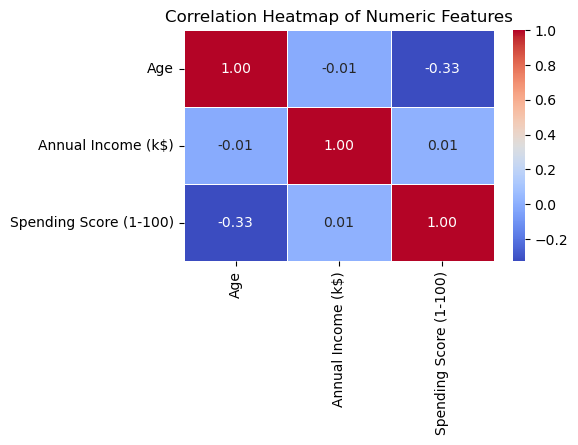

In [26]:
#heatmap of correlation matrix

plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [28]:
#Average spending by gender

avg_spending_by_gender = df.groupby("Genre")["Spending Score (1-100)"].mean()
print("Average Spending Score by Gender:", avg_spending_by_gender)


Average Spending Score by Gender: Genre
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


In [32]:
#Create a pivot table by age group and gender for average spending

pivot_table = pd.pivot_table(
    df,
    values="Spending Score (1-100)",
    index="AgeGroup",
    columns="Genre",
    aggfunc="mean"
)

print("Pivot Table: Average Spending Score by Age Group and Gender\n")
print(pivot_table)


Pivot Table: Average Spending Score by Age Group and Gender

Genre        Female      Male
AgeGroup                     
Young     59.947368  51.87500
Adult     57.125000  57.20000
Senior    38.729730  35.96875


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16632\3213242093.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


#### Part D — Visualizations & group exploration

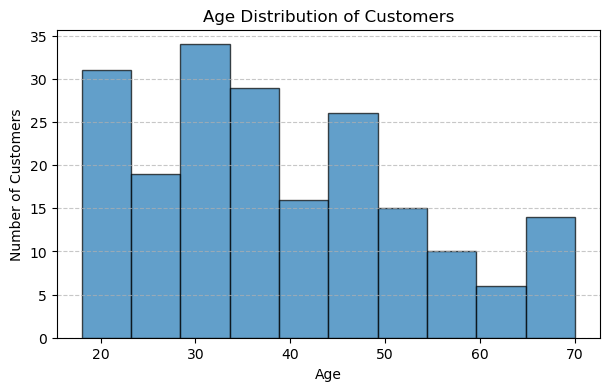

In [34]:
#Plot a histogram of the Age distribution

plt.figure(figsize=(7,4))
plt.hist(df["Age"], bins=10, edgecolor="black", alpha=0.7)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


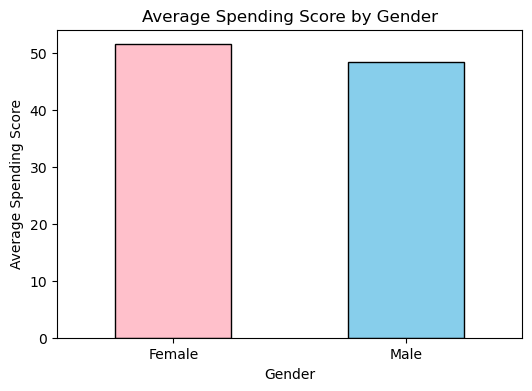

In [41]:
#Create a bar chart of average spending score by gender.

avg_spending_by_gender = df.groupby("Genre")["Spending Score (1-100)"].mean()

plt.figure(figsize=(6,4))
avg_spending_by_gender.plot(kind="bar", color=["pink", "skyblue"], edgecolor="black")

plt.title("Average Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spending Score")
plt.xticks(rotation=0)
plt.show()


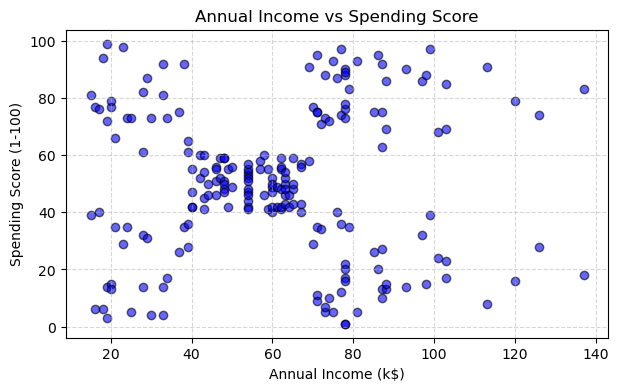

In [43]:
#Create a scatter plot of Annual Income vs Spending Score

plt.figure(figsize=(7,4))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], 
            c="blue", alpha=0.6, edgecolor="k")

plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16632\2902763958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeGroup", y="Spending Score (1-100)", data=df, palette="Set2")


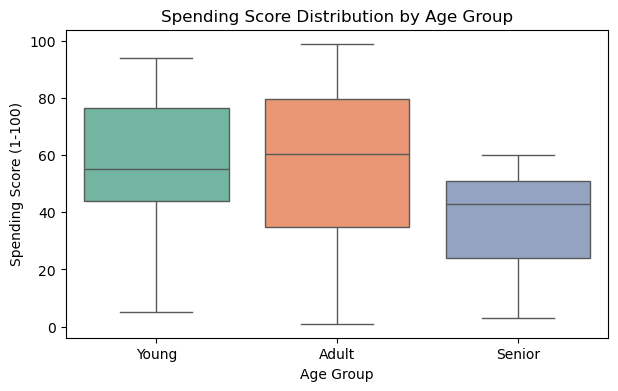

In [45]:
#Create a boxplot of spending score grouped by age bins

plt.figure(figsize=(7,4))
sns.boxplot(x="AgeGroup", y="Spending Score (1-100)", data=df, palette="Set2")

plt.title("Spending Score Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Spending Score (1-100)")
plt.show()


#### Part E — Dimensionality reduction

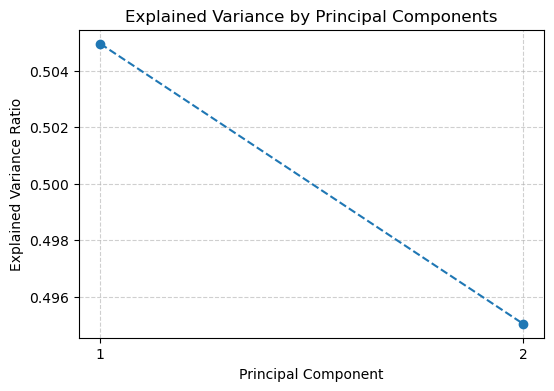

In [48]:
#Run PCA on standardized income and spending features and plot explained variance.

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker="o", linestyle="--")

plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

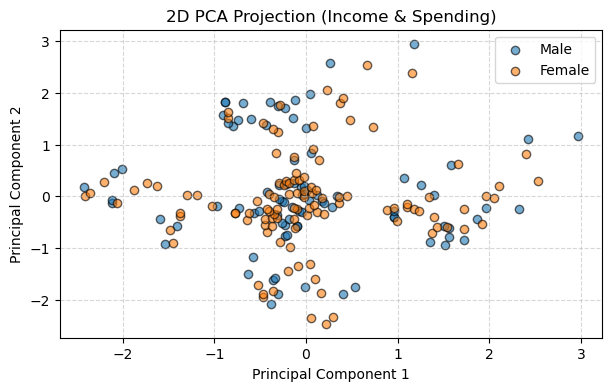

In [50]:
#Plot 2D PCA components scatter colored by a category (e.g., Gender).

df["PC1"] = X_pca[:,0]
df["PC2"] = X_pca[:,1]

# Scatter plot colored by Gender
plt.figure(figsize=(7,4))
for gender, color in zip(df["Genre"].unique(), ["blue", "red"]):
    subset = df[df["Genre"] == gender]
    plt.scatter(subset["PC1"], subset["PC2"], label=gender, alpha=0.6, edgecolor="k")

plt.title("2D PCA Projection (Income & Spending)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


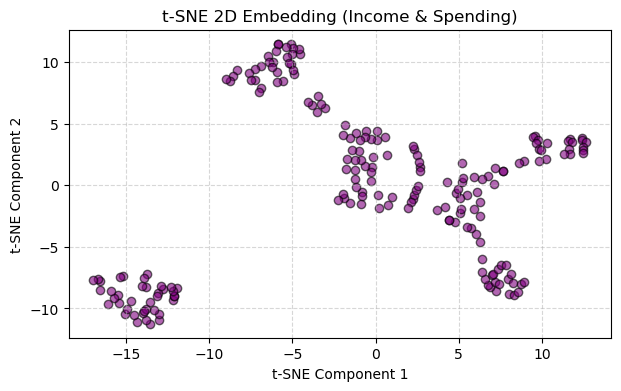

In [53]:
#Run t-SNE and plot the 2D embedding.

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

df["TSNE1"] = X_tsne[:,0]
df["TSNE2"] = X_tsne[:,1]

plt.figure(figsize=(7,4))
plt.scatter(df["TSNE1"], df["TSNE2"], c="purple", alpha=0.6, edgecolor="k")

plt.title("t-SNE 2D Embedding (Income & Spending)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


#### Part F — Clustering & evaluation

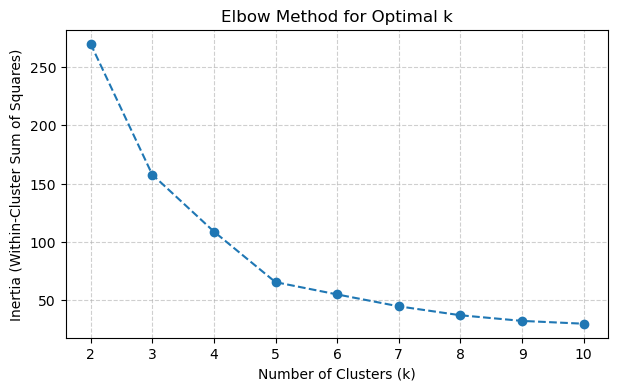

In [71]:
#Run k-means for k=2…10 on standardized features and plot the elbow curve.

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


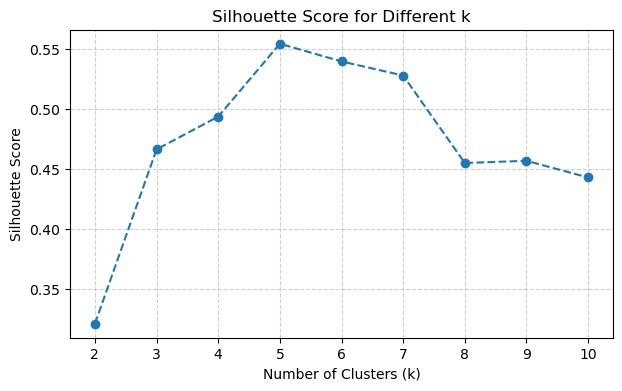

Best k based on silhouette score: 5


In [73]:
#Compute silhouette score for each k and identify the best k.
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7,4))
plt.plot(K, silhouette_scores, marker="o", linestyle="--")
plt.title("Silhouette Score for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(K)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Best k
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k based on silhouette score: {best_k}")



Best k based on silhouette score: 5


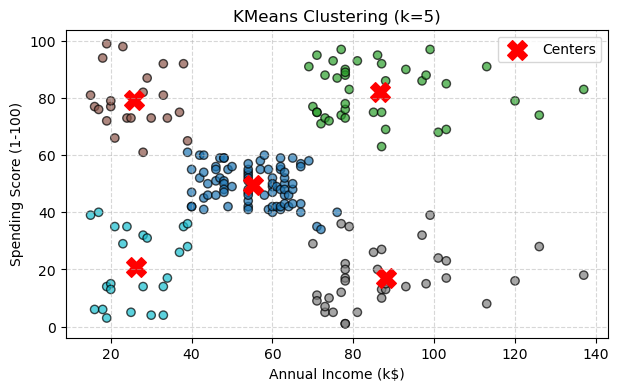

In [75]:
#Plot clusters for the chosen k using a scatter plot

silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k based on silhouette score: {best_k}")

# Run KMeans with best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(7,4))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster"], cmap="tab10", alpha=0.7, edgecolor="k")


centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="red", marker="X", s=200, label="Centers")

plt.title(f"KMeans Clustering (k={best_k})")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


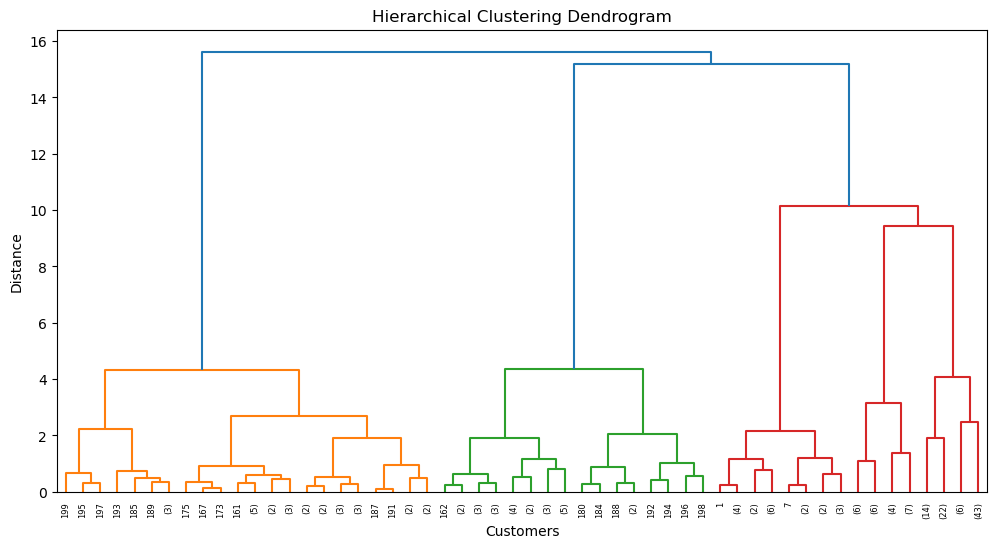

In [79]:
#Run hierarchical clustering and visualize a dendrogram.

Z = linkage(X_scaled, method="ward") 

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


Adjusted Rand Index (ARI) between Hierarchical and KMeans (k=5): 0.942


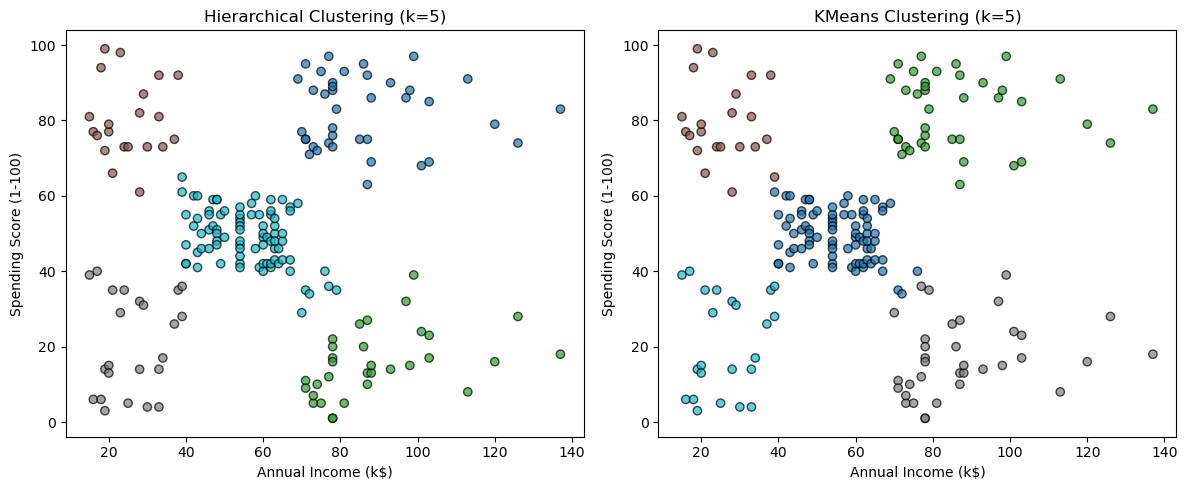

In [82]:
#Cut the dendrogram at k clusters and compare with k-means

Z= linkage(X_scaled, method="ward")

k = 5
hier_clusters = fcluster(Z, k, criterion="maxclust")
df["HierCluster"] = hier_clusters

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["KMeansCluster"] = kmeans.fit_predict(X_scaled)

ari = adjusted_rand_score(df["HierCluster"], df["KMeansCluster"])
print(f"Adjusted Rand Index (ARI) between Hierarchical and KMeans (k={k}): {ari:.3f}")

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
                c=df["HierCluster"], cmap="tab10", alpha=0.7, edgecolor="k")
axes[0].set_title("Hierarchical Clustering (k=5)")
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score (1-100)")

axes[1].scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
                c=df["KMeansCluster"], cmap="tab10", alpha=0.7, edgecolor="k")
axes[1].set_title("KMeans Clustering (k=5)")
axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()

In [84]:
#Profile each cluster: average age, income, spending score.

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["KMeansCluster"] = kmeans.fit_predict(X_scaled)

# Profile KMeans clusters
kmeans_profile = df.groupby("KMeansCluster").agg({
    "Age": "mean",
    "Annual Income (k$)": "mean",
    "Spending Score (1-100)": "mean",
    "CustomerID": "count"   # cluster size
}).rename(columns={"CustomerID": "Cluster Size"}).round(2)

print("KMeans Cluster Profiles:\n")
print(kmeans_profile)

# Profile Hierarchical clusters
if "HierCluster" in df.columns:
    hier_profile = df.groupby("HierCluster").agg({
        "Age": "mean",
        "Annual Income (k$)": "mean",
        "Spending Score (1-100)": "mean",
        "CustomerID": "count"
    }).rename(columns={"CustomerID": "Cluster Size"}).round(2)

    print("\nHierarchical Cluster Profiles:\n")
    print(hier_profile)


KMeans Cluster Profiles:

                 Age  Annual Income (k$)  Spending Score (1-100)  Cluster Size
KMeansCluster                                                                 
0              42.72               55.30                   49.52            81
1              32.69               86.54                   82.13            39
2              25.27               25.73                   79.36            22
3              41.11               88.20                   17.11            35
4              45.22               26.30                   20.91            23

Hierarchical Cluster Profiles:

               Age  Annual Income (k$)  Spending Score (1-100)  Cluster Size
HierCluster                                                                 
1            32.69               86.54                   82.13            39
2            41.00               89.41                   15.59            32
3            25.33               25.10                   80.05            21
4  

In [ ]:
#Run k-means with different random states and see if cluster assignments change.

k = 5

random_states = [0, 1, 2, 42, 123, 2023]
assignments = {}

for state in random_states:
    kmeans = KMeans(n_clusters=k, random_state=state, n_init=10)
    assignments[state] = kmeans.fit_predict(X_scaled)

# Compare ARI between runs
print("Adjusted Rand Index (ARI) comparisons between random states:\n")
for i in range(len(random_states)):
    for j in range(i+1, len(random_states)):
        ari = adjusted_rand_score(assignments[random_states[i]], assignments[random_states[j]])
        print(f"State {random_states[i]} vs {random_states[j]}: ARI = {ari:.3f}")


Adjusted Rand Index (ARI) comparisons between random states:

State 0 vs 1: ARI = 1.000
State 0 vs 2: ARI = 1.000
State 0 vs 42: ARI = 1.000
State 0 vs 123: ARI = 1.000
State 0 vs 2023: ARI = 1.000
State 1 vs 2: ARI = 1.000
State 1 vs 42: ARI = 1.000
State 1 vs 123: ARI = 1.000
State 1 vs 2023: ARI = 1.000
State 2 vs 42: ARI = 1.000
State 2 vs 123: ARI = 1.000
State 2 vs 2023: ARI = 1.000
State 42 vs 123: ARI = 1.000
State 42 vs 2023: ARI = 1.000
State 123 vs 2023: ARI = 1.000


In [87]:
#Export the dataset with cluster labels to CSV

df.to_csv("Mall_Customers_with_clusters.csv", index=False)
